# AERODATA submission
Siddhant Verma

roll no:- 24a12res671


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

flight_data=pd.read_csv('https://raw.githubusercontent.com/SiddhantV369/predictive-modelling/main/IndianFlightdata.csv')
flight_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Sub problems
1. does price vary with airlines

2. Does the price change depend on departure and arrival time?
3. how does ticket price vary with change in source , destination and number of stops.
4. variables that have most influence over the ticket price.
5. duration of flight and number of stops


# Handling Missing values

In [ ]:
# handling mising values
count_missing=flight_data.isnull().sum()
print(count_missing)
print(flight_data[flight_data['Route'].isnull()])
flight_data.dropna(inplace=True)                          #dropping the record as theres only one record with missing values
print()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64
        Airline Date_of_Journey Source Destination Route Dep_Time  \
9039  Air India       6/05/2019  Delhi      Cochin   NaN    09:45   

      Arrival_Time Duration Total_Stops Additional_Info  Price  
9039  09:25 07 May  23h 40m         NaN         No info   7480  



In [ ]:
flight_data.describe(include='all')


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10682,10682,10682,10682,10682,10682,10682,10682,10682,10682,10682.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4536,4536,2376,233,423,550,5625,8344,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.214567
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.548810
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


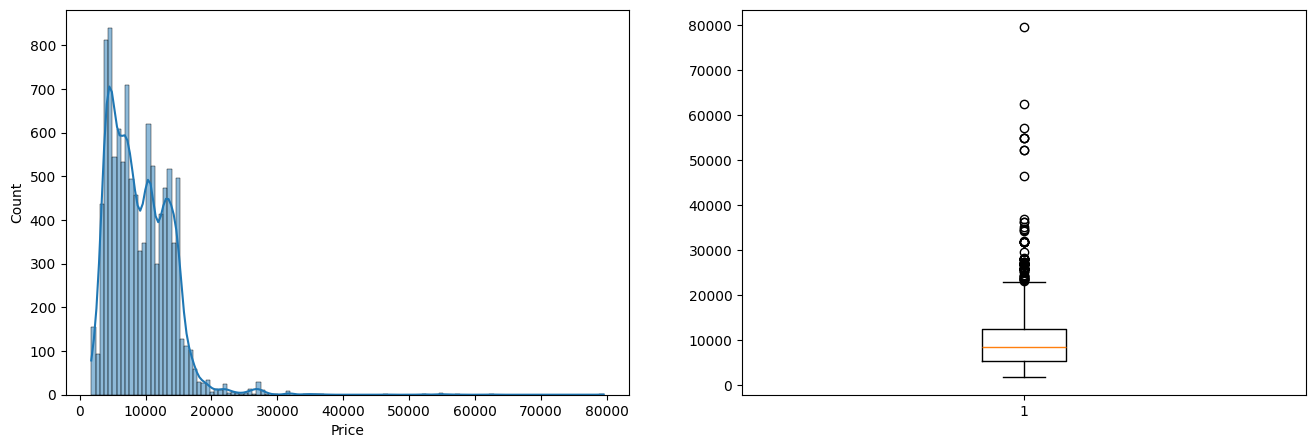

In [ ]:
def plot_outliers(df):
  plt.figure(figsize=(16,5))
  plt.subplot(1,2,1)
  sns.histplot(x='Price',data=df,kde=True)

  plt.subplot(1,2,2)
  plt.boxplot(df['Price'])

  plt.show()

plot_outliers(flight_data)

# Handling outliers using methods like
1. Winsorizing (setting the extreme values to maximum/minimum possible limits
2. Logarithmic transformations (as the data is highly right skewed)

we will evaluate further which apporach would give better results at the time of model evaluation

Number of records 10682
Number of outliers 94


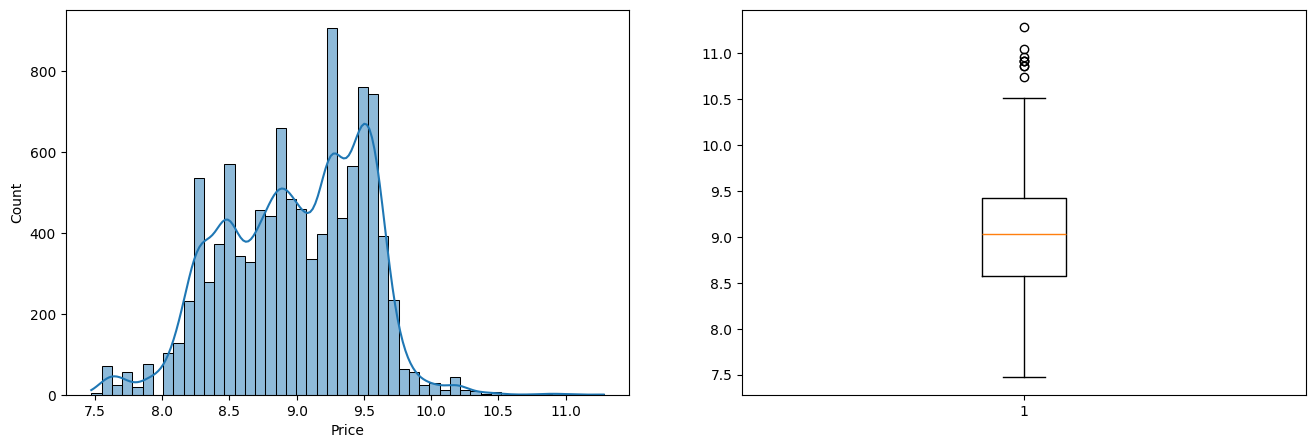

In [ ]:
# handling outliers
q1=flight_data['Price'].quantile(0.25)
q3=flight_data['Price'].quantile(0.75)
iqr=q3-q1
upper_bound=q3+(1.5*iqr)
lower_bound=q1-(1.5*iqr)


# we reduce the effect of outliers by replacing extreme values with lowest permissible values
# another way is using log transformation as it is a right skewed distribution


outliers=flight_data[(flight_data['Price']>upper_bound) | (flight_data['Price']<lower_bound)]
print("Number of records",flight_data.shape[0])
print("Number of outliers",outliers.shape[0])

flight_data['Price'] = np.log(flight_data['Price'])                 #log transformation
#flight_data['Price']=flight_data['Price'].clip(lower=lower_bound,upper=upper_bound)    #replacing extremes
plot_outliers(flight_data)

Here we are preprocesing the duration and time variables to make it easier to visualize

further we will analyse the the factors like arrival and departure time , duration of flight and number of stops to find any possiblity of relatioship

grapths to plot
1. price V/s arrival  &  price V/s departure
2. number of stops V/s price
3. duration of flight V/s price
4. Airline V/s price

In [ ]:
def convert_duration(duration):
    parts = duration.split()
    total_minutes = 0
    for part in parts:
        if 'h' in part:
            total_minutes += int(part.replace('h', '')) * 60
        elif 'm' in part:
            total_minutes += int(part.replace('m', ''))
    return total_minutes/60

flight_data['Duration'] = flight_data['Duration'].apply(convert_duration)

In [ ]:
#preprossing deprture and arrival time
flight_data['Dep_Time_hour'] = pd.to_datetime(flight_data['Dep_Time']).dt.hour
flight_data['Arrival_Time_hour'] = pd.to_datetime(flight_data['Arrival_Time'].apply(lambda x:x[0:5])).dt.hour

def time_of_day(hour):
    if 3 <= hour < 7 :
        return 'Early Morning'
    elif 7 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 16:
        return 'AfterNoon'
    elif 16 <= hour < 20:
        return 'evening'
    elif 20 <=hour <23:
        return 'Night'
    else:
        return 'Late Night'

flight_data['Dep_Time_of_Day'] = flight_data['Dep_Time_hour'].apply(time_of_day)
flight_data['Arrival_Time_of_Day'] = flight_data['Arrival_Time_hour'].apply(time_of_day)
# display(flight_data[['Dep_Time', 'Dep_Time_of_Day', 'Arrival_Time', 'Arrival_Time_of_Day']].head())

/tmp/ipython-input-3500483091.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  flight_data['Dep_Time_hour'] = pd.to_datetime(flight_data['Dep_Time']).dt.hour
/tmp/ipython-input-3500483091.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  flight_data['Arrival_Time_hour'] = pd.to_datetime(flight_data['Arrival_Time'].apply(lambda x:x[0:5])).dt.hour


Text(0.5, 1.0, 'Airline prices based on the arrival time')

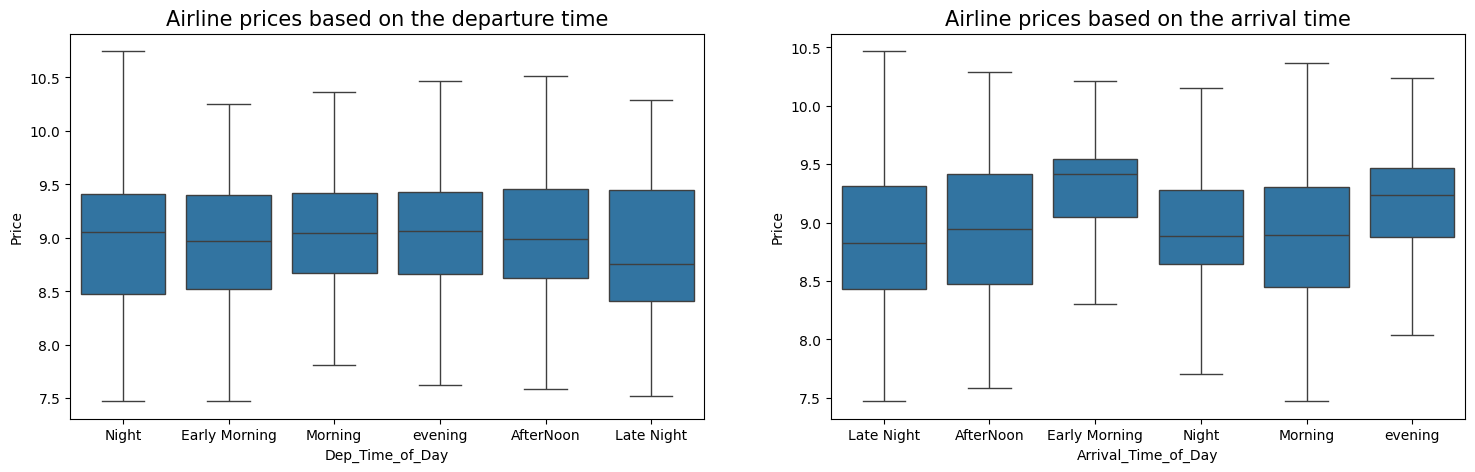

In [ ]:
plt.figure(figsize = (18,5))

plt.subplot(1,2,1)
plot1=sns.boxplot(data=flight_data, y="Price", x="Dep_Time_of_Day",showfliers=False)    # Departure Time
plot1.set_title("Airline prices based on the departure time",fontsize=15)

plt.subplot(1,2,2)
plot2=sns.boxplot(data=flight_data, y="Price", x="Arrival_Time_of_Day",showfliers=False)  #Arrival time
plot2.set_title("Airline prices based on the arrival time",fontsize=15)

there isn't a significant pattern in departure times , although leaving at night might have chances of finding cheaper flights

but the planes arriving early morning or evening has a significantly higher price

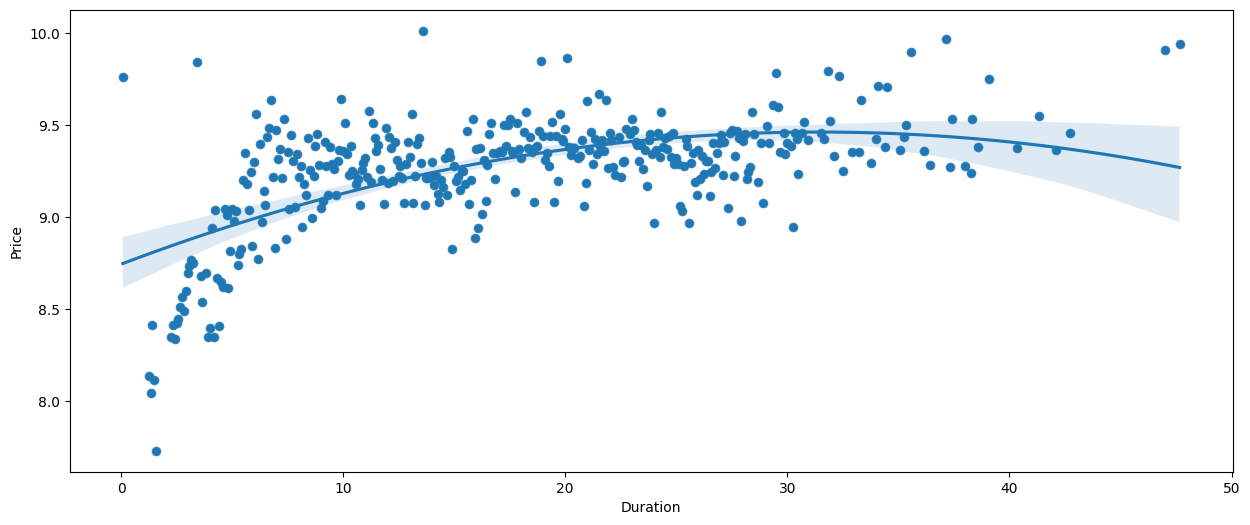

In [ ]:

df_temp = flight_data.groupby(['Duration'])['Price'].mean().reset_index()

plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="Duration", y="Price", data=df_temp)
ax = sns.regplot(x="Duration", y="Price", data=df_temp, order=2)


 however some outliers seem to affect the regression curve

 it is clear that here the relationship is not linear so it can be approximated with a second degree curve.

 The prices reaches a high price at a duration of 26-28 hours beforelowering ever so slightly



<Axes: xlabel='Airline', ylabel='Price'>

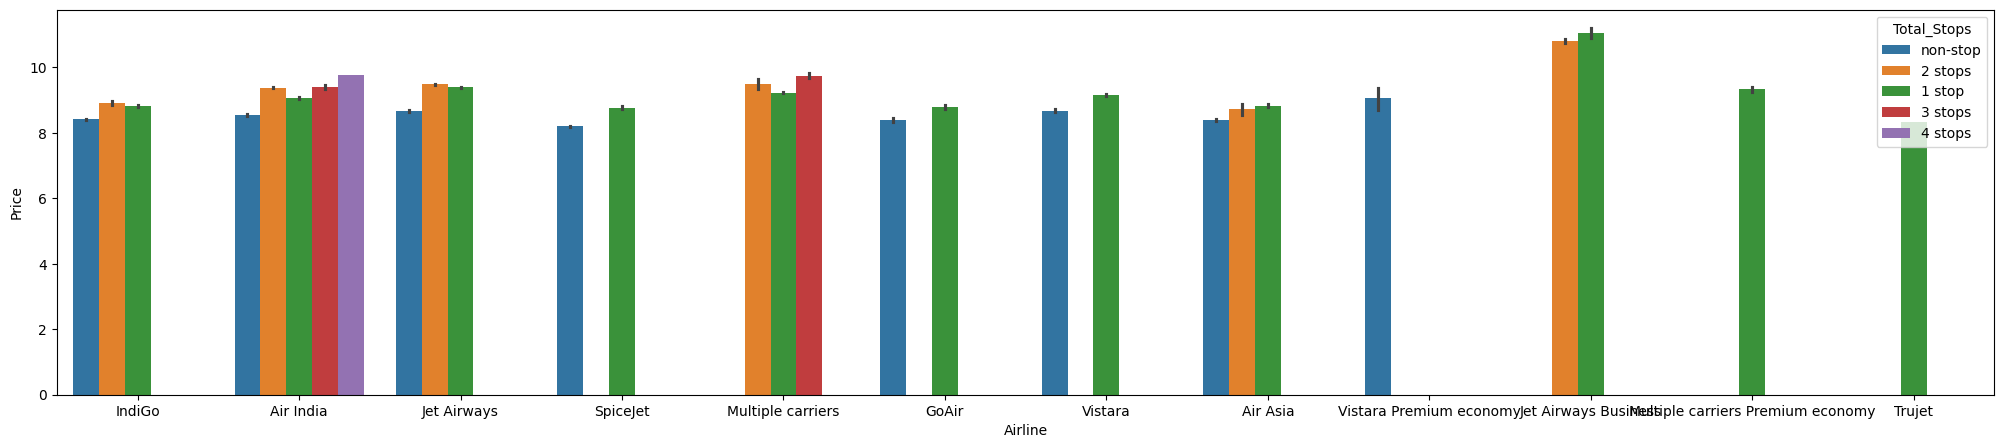

In [ ]:
plt.figure(figsize=(25,5))
sns.barplot(x='Airline',y='Price',hue='Total_Stops',data=flight_data)

In [ ]:
# plt.figure(figsize=(12, 6))                                       #we might need this plot but the previous plot shows similar metrics
# sns.boxplot(x='Airline', y='Price', data=flight_data)
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

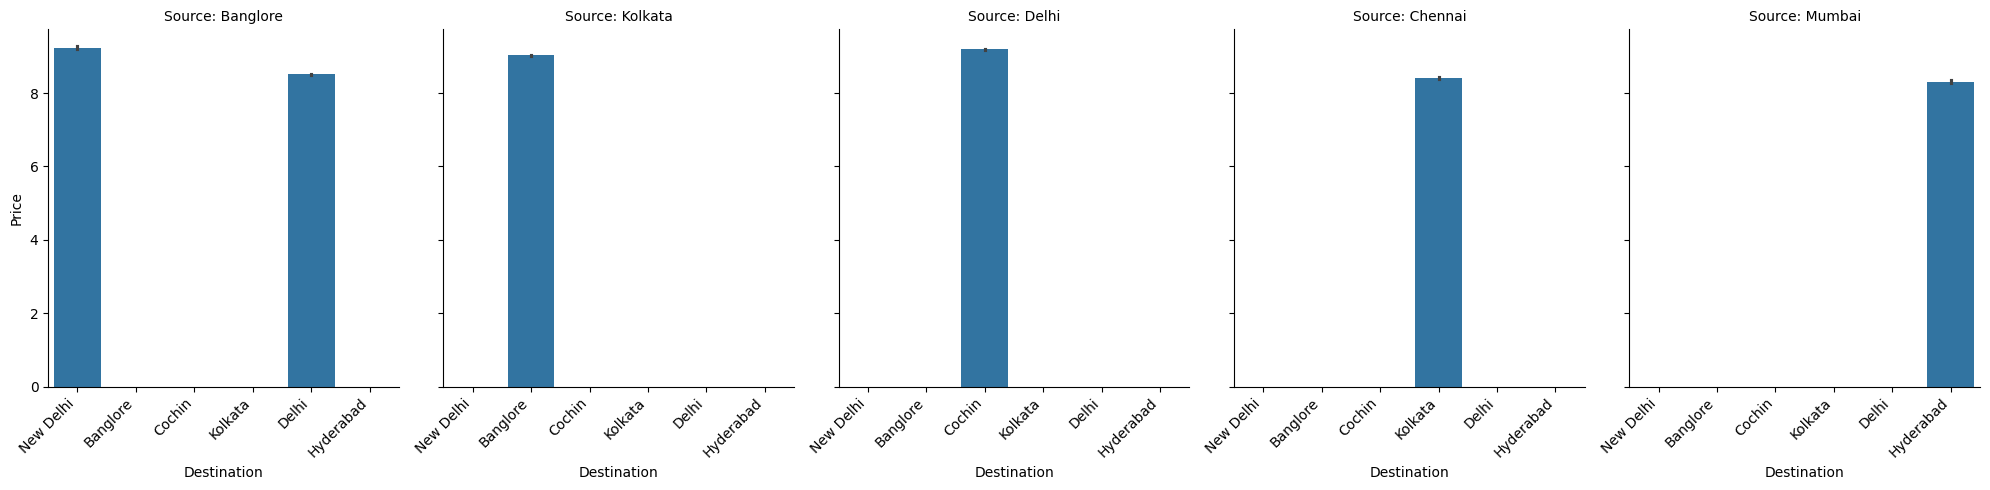

In [ ]:
g = sns.FacetGrid(flight_data, col="Source", height=5, aspect=.8)
g.map(sns.barplot, "Destination", "Price", order=flight_data['Destination'].unique())
g.set_titles("Source: {col_name}")
g.set_axis_labels("Destination", "Price")
g.set_xticklabels(rotation=45,ha='right')
plt.tight_layout()
plt.show()

flights going to Chennai and Mumbai are cheaper compared to other destinations

# Plotting correlation matix to identify linear relationships between numerical and categorial variables.

In [ ]:
def preprocessing_categorial_data(df):                       # encoding categorial variable for plotting correlation matrix
    #encode variables "stops" and "class".
    df["Total_Stops"] = df["Total_Stops"].replace({'non-stop':0,'1 stop':1,'2 stops':2,"3 stops":3,"4 stops":4}).astype(int)


    #Create the dummy variables
    dummies_variables = ["Airline","Source","Destination","Dep_Time_of_Day","Arrival_Time_of_Day"]
    dummies = pd.get_dummies(df[dummies_variables], drop_first= True)
    df = pd.concat([df,dummies],axis=1)


    df = df.drop(["Airline","Source","Destination","Dep_Time_of_Day","Arrival_Time_of_Day"],axis=1)
    return df

In [ ]:
newdf=preprocessing_categorial_data(flight_data.copy())

/tmp/ipython-input-1095822813.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Total_Stops"] = df["Total_Stops"].replace({'non-stop':0,'1 stop':1,'2 stops':2,"3 stops":3,"4 stops":4}).astype(int)


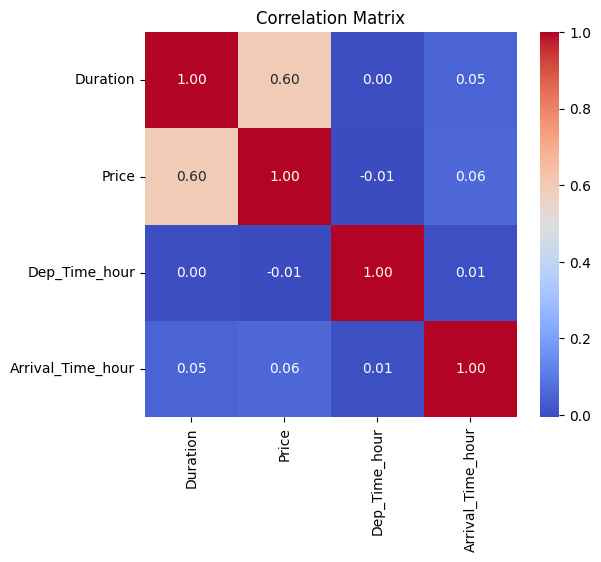

In [ ]:

plt.figure(figsize=(6,5))
sns.heatmap(flight_data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

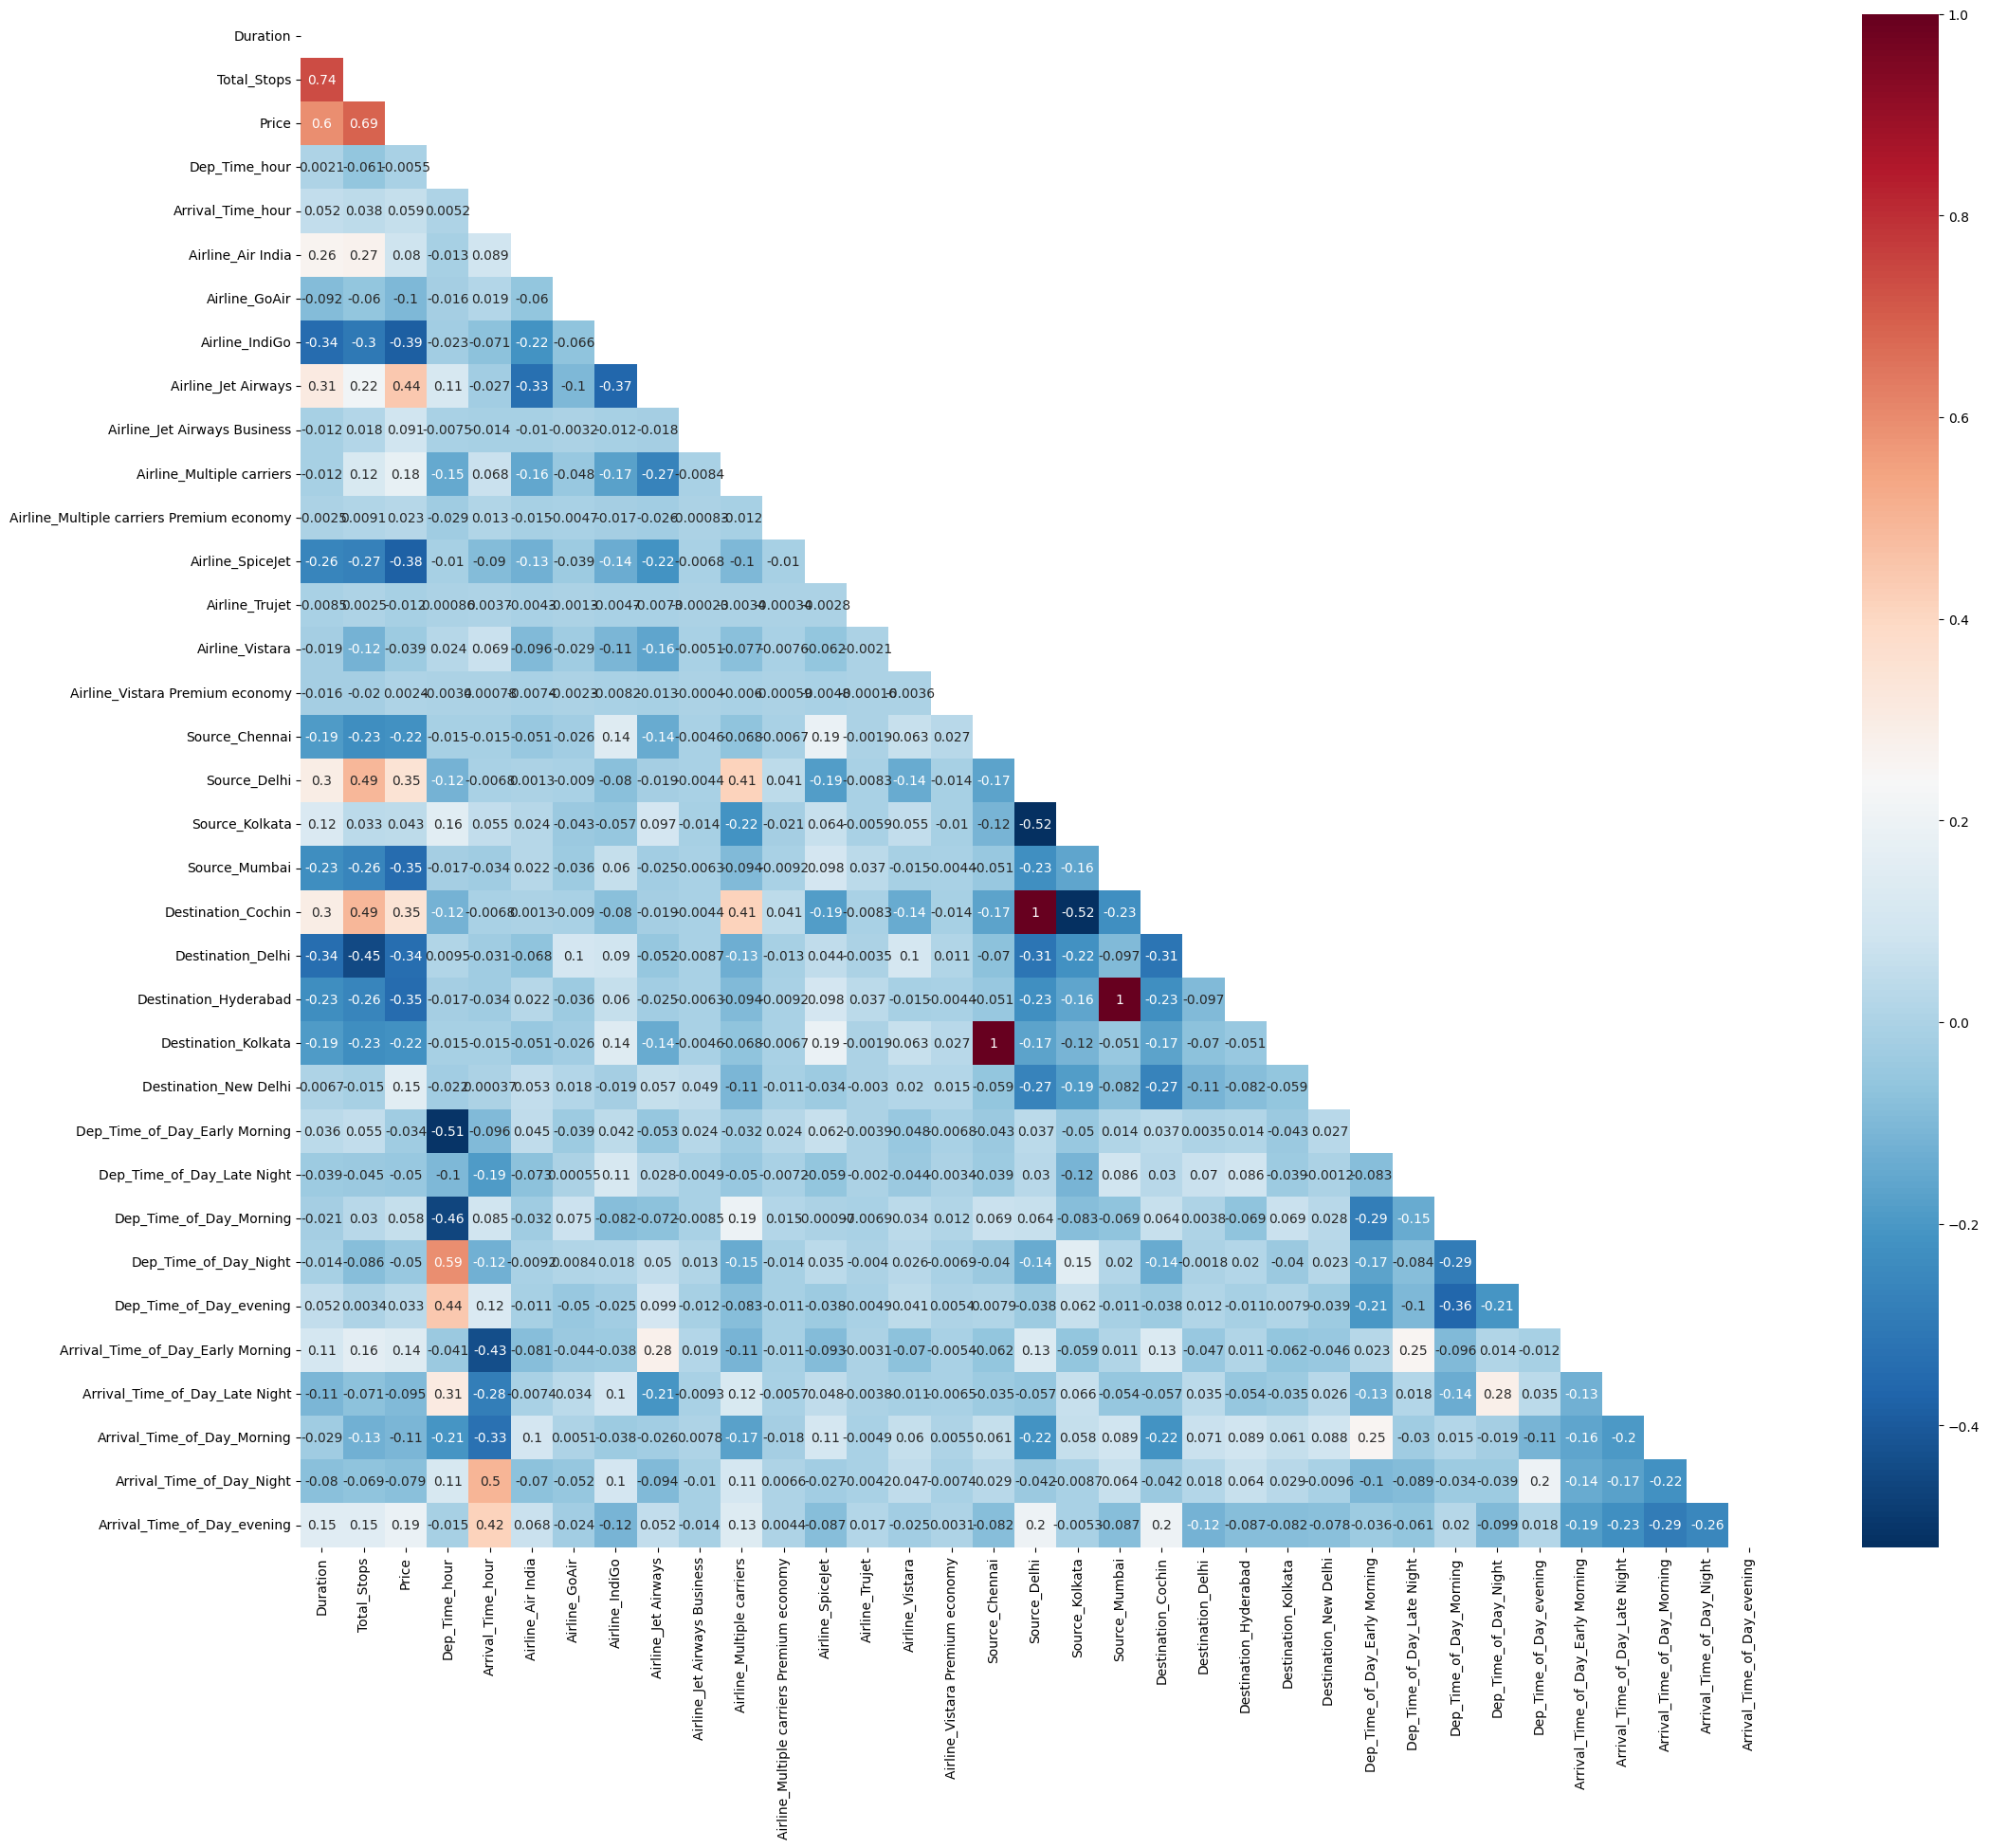

In [21]:
mask = np.triu(np.ones_like(newdf.corr(numeric_only=True), dtype=bool))
plt.figure(figsize = (25,21))
sns.heatmap(newdf.corr(numeric_only=True), mask=mask,annot = True, cmap = 'RdBu_r')
plt.show()

# Model Training and Evaluation
for now we are Testing 3 models
1. KNeighbors Regression
2. Linear Regression
3. XGBoost Regression




In [20]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,confusion_matrix,root_mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


models = {}

models["KNeighborsRegressor"]={"model":KNeighborsRegressor(n_neighbors=50)}
models["LinearRegression"]={"model":LinearRegression()}
models["XGBRegressor"]={"model":XGBRegressor(n_jobs=5,learning_rate=0.1,max_depth=10,random_state=1)}

X = flight_data.copy()
y = X.pop('Price')

xtrain,xtest,ytrain,ytest = train_test_split(X,y,random_state = 1,test_size=0.21, shuffle=True)


# identify categorical and num features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=np.number).columns

# creating preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # keep columns that are not categorical
)

for name, model_info in models.items():
    model_info["pipeline"] = Pipeline(steps=[('preprocessor', preprocessor),
                                             ('regressor', model_info["model"])])


def plot_model(ytest,ypred):
  fig,ax = plt.subplots(figsize=(5,5))
  ax.set_title("Price",fontsize=20)
  ax.set_ylabel('Test Predicted price',fontsize=12)
  ax.set_xlabel('Test Actual price',fontsize=12)
  ax.scatter(ytest,ypred)

def get_scores(models, xtrain, ytrain, xtest, ytest):
    for name, model_info in models.items():
        model_info["pipeline"].fit(xtrain, ytrain)
        ypred = model_info["pipeline"].predict(xtest)
        score_r2 = r2_score(ytest, ypred)
        mae = np.mean(np.abs(ytest - ypred))
        rms_err=root_mean_squared_error(ytest,ypred)
        # plot_model(ytest,ypred)
        print(name)
        print("RMSE:",rms_err)
        print("MAE:", mae)
        print("R2 score:",score_r2)
        print()

get_scores(models, xtrain, ytrain, xtest, ytest)

KNeighborsRegressor
RMSE: 0.27645542783561927
MAE: 0.21125596135192676
R2 score: 0.7073423255017375

LinearRegression
RMSE: 0.1588089028199586
MAE: 0.11200572016395974
R2 score: 0.9034261899538674

XGBRegressor
RMSE: 0.12626884593035892
MAE: 0.08560176223949453
R2 score: 0.9389476904890981



it seems that the best result is given By XGB regressor model
as there may be some non linear relationships present between the variables.

After testing with both outlier handling methods
**`Logarithmic transformation`** gives slightly better result.

since XGB Regressor gives best results we will move forward with it and Fine tune the model to imporve the results by using sklearn's "grid search cv"


Best parameters found:  {'regressor__learning_rate': 0.2, 'regressor__max_depth': 7, 'regressor__n_estimators': 300}
Best R2 score found:  0.9384370337930188

Tuned XGBRegressor performance on test set:
RMSE: 0.1189726671324294
MAE: 0.07928051989580473
R2 score: 0.9457994029656738


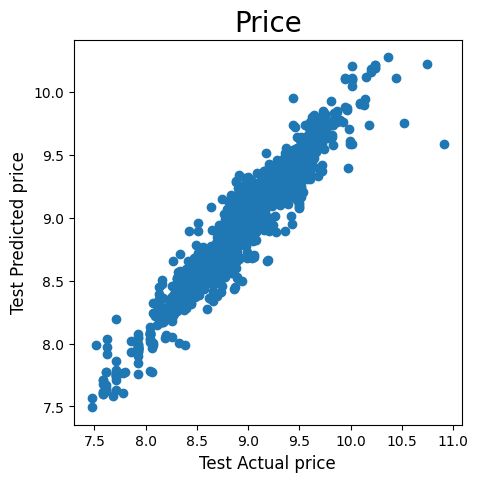

In [ ]:
from sklearn.model_selection import GridSearchCV

xgb_param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__max_depth': [3, 5, 7]
}

xgb_grid_search = GridSearchCV(models["XGBRegressor"]["pipeline"], xgb_param_grid, cv=5, scoring='r2', n_jobs=-1)
xgb_grid_search.fit(xtrain, ytrain)

print("Best parameters found: ", xgb_grid_search.best_params_)
print("Best R2 score found: ", xgb_grid_search.best_score_)

# evaluate the best model on the test data
best_xgb_model = xgb_grid_search.best_estimator_
ypred_xgb_tuned = best_xgb_model.predict(xtest)
score_r2_xgb_tuned = r2_score(ytest, ypred_xgb_tuned)
mae_xgb_tuned = np.mean(np.abs(ytest - ypred_xgb_tuned))
rms_err_xgb_tuned=root_mean_squared_error(ytest,ypred_xgb_tuned)

print("\nTuned XGBRegressor performance on test set:")
print("RMSE:",rms_err_xgb_tuned)
print("MAE:", mae_xgb_tuned)
print("R2 score:",score_r2_xgb_tuned)

plot_model(ytest,ypred_xgb_tuned)

# by using XG boost and Hyperparameter tuning we are able to achive R2 score of 0.9457

Root mean squared error of 0.1189 ,
Mean Absolute Error of 0.0792
